In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
austin_crime = pd.read_csv('data/crime-housing-austin-2015.csv')
austin_weather = pd.read_csv('data/austin_weather.csv')

austin_crime = austin_crime.drop('Location', axis=1)

def percentage_to_float(value):
    try:
        return float(value.strip('%')) / 100
    except:
        return value

def currency_to_float(value):
    try:
        return float(value.replace('$', '').replace(',', ''))
    except:
        return value

percentage_columns = [
    'Populationbelowpovertylevel', 'Non-WhiteNon-HispanicorLatino', 
    'HispanicorLatinoofanyrace', 'Populationwithdisability', 'Unemployment',
    'Largehouseholds(5+members)', 'Homesaffordabletopeopleearninglessthan$50000',
    'Rentalsaffordabletopeopleearninglessthan$25000', 'Rent-restrictedunits',
    'HousingChoiceVoucherholders', 'Percentageofrentalunitsinpoorcondition',
    'Percentchangeinnumberofhousingunits2000-2012',
    'Changeinpercentageofpopulationbelowpoverty2000-2012',
    'Changeinmedianrent2000-2012', 'Changeinmedianhomevalue2000-2012',
    'Percentageofhomeswithin1/4-mioftransitstop',
    'Percentageofhousingandtransportationcoststhatistransportation-related'
]

currency_columns = ['Medianhouseholdincome', 'Medianrent', 'Medianhomevalue', 'Averagemonthlytransportationcost']


for col in percentage_columns:
    austin_crime[col] = austin_crime[col].apply(percentage_to_float)

for col in currency_columns:
    austin_crime[col] = austin_crime[col].apply(currency_to_float)

print(austin_crime.dtypes)

Key                                                                        int64
Council_District                                                         float64
Highest_Offense_Desc                                                      object
Highest_NIBRS_UCR_Offense_Description                                     object
Report_Date                                                               object
Clearance_Status                                                          object
Clearance_Date                                                            object
District                                                                  object
Zip_Code_Crime                                                           float64
Census_Tract                                                             float64
X_Coordinate                                                             float64
Y_Coordinate                                                             float64
Zip_Code_Housing            

In [3]:
austin_crime['Zip_Code_Crime'].unique()

array([78753., 78751., 78744., 78741., 78727., 78721., 78759., 78757.,
       78752., 78758., 78702., 78704., 78701., 78719., 78723., 78745.,
       78748., 78617., 78729., 78653., 78756., 78746., 78722., 78731.,
       78703., 78724., 78747., 78749., 78726., 78705., 78717., 78750.,
       78613., 78754.,    nan, 78660., 78735., 78730., 78742., 78739.,
       78736., 78725., 78732., 78728., 78652., 78733., 78737., 78712.])

In [4]:
austin_weather

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [5]:
austin_crime

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,Census_Tract,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,N,28-Jan-15,E,78753.0,18.13,...,89%,75%,100%,98%,1.28,0.26,0.40,0.59,708.0,0.44
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,N,13-Jan-15,I,78751.0,21.05,...,68%,10%,97%,42%,0.23,0.38,0.97,0.98,550.0,0.40
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,N,13-Jan-15,E,78753.0,18.35,...,89%,75%,100%,98%,1.28,0.26,0.40,0.59,708.0,0.44
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,N,5-Jan-15,I,78753.0,18.13,...,89%,75%,100%,98%,1.28,0.26,0.40,0.59,708.0,0.44
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,N,7-Jan-15,F,78744.0,24.27,...,81%,87%,100%,100%,0.89,0.26,0.44,0.63,708.0,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38568,20153650803,1.0,THEFT,Theft,31-Dec-15,NaN,NaN,C,78702.0,8.02,...,80%,15%,99%,67%,0.03,0.73,2.07,0.96,590.0,0.39
38569,20155056956,6.0,THEFT,Theft,31-Dec-15,N,13-Jan-16,A,78750.0,204.03,...,70%,15%,99%,51%,1.04,0.20,0.64,0.21,747.0,0.33
38570,20153651059,10.0,THEFT,Theft,31-Dec-15,C,8-Feb-16,B,78731.0,17.18,...,67%,12%,97%,26%,0.26,0.31,0.68,0.44,747.0,0.32
38571,20153651185,1.0,THEFT,Theft,31-Dec-15,N,10-Feb-16,C,78724.0,22.11,...,78%,84%,100%,96%,2.08,0.37,0.46,0.21,786.0,0.40


In [6]:
# pairplot = sns.pairplot(austin_crime, diag_kind='kde')
# plt.savefig('plots/pair_plot.png')

/tmp/ipykernel_588209/3066137209.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  austin_crime['Month'] = pd.to_datetime(austin_crime['Report_Date']).dt.month


<Axes: xlabel='Month', ylabel='count'>

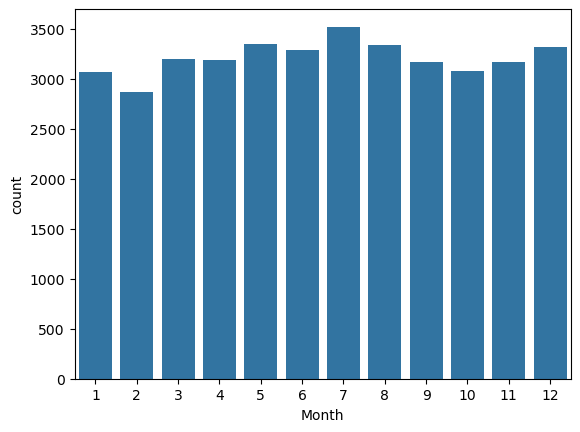

In [7]:
# Crime by month
austin_crime['Month'] = pd.to_datetime(austin_crime['Report_Date']).dt.month
sns.countplot(x='Month', data=austin_crime)

/tmp/ipykernel_588209/1159251486.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  austin_crime['Day'] = pd.to_datetime(austin_crime['Report_Date']).dt.dayofweek


<Axes: xlabel='Day', ylabel='count'>

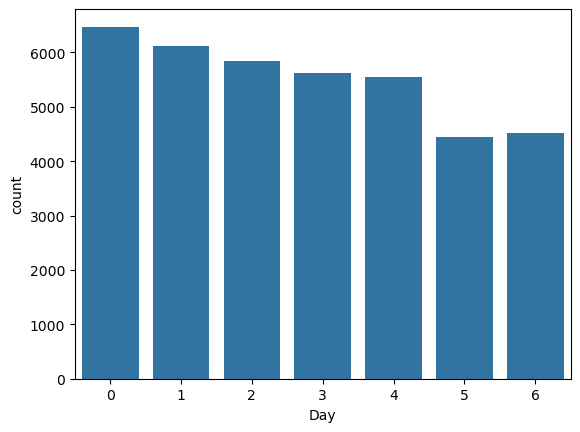

In [8]:
# Crime by day of week
austin_crime['Day'] = pd.to_datetime(austin_crime['Report_Date']).dt.dayofweek
sns.countplot(x='Day', data=austin_crime)

/tmp/ipykernel_588209/4200704927.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  austin_crime['Day'] = pd.to_datetime(austin_crime['Report_Date']).dt.day


<Axes: xlabel='Day', ylabel='count'>

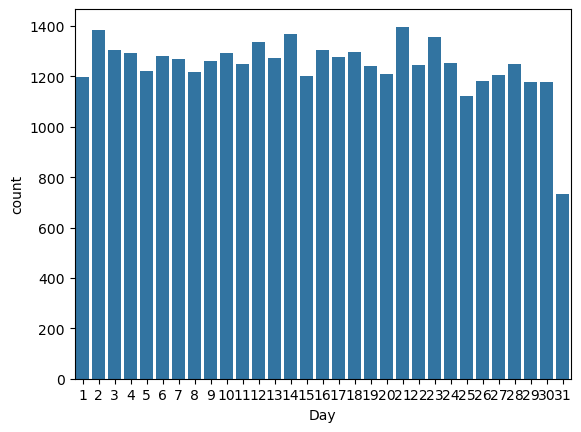

In [9]:
# Crime by day of month 
austin_crime['Day'] = pd.to_datetime(austin_crime['Report_Date']).dt.day
sns.countplot(x='Day', data=austin_crime)

In [10]:
# Merge crime and weather data, get a daily high and low temperature for each crime
high_low_temp = austin_weather.groupby('Date').agg({'TempHighF': 'max', 'TempLowF': 'min'}).reset_index()

# Convert the date to a datetime object, for high_low_temp and austin_crime
high_low_temp['Date'] = pd.to_datetime(high_low_temp['Date'])
austin_crime['Report_Date'] = pd.to_datetime(austin_crime['Report_Date'])

# Merge the two dataframes
austin_crime = austin_crime.merge(high_low_temp, left_on='Report_Date', right_on='Date')
austin_crime

/tmp/ipykernel_588209/2767542798.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  austin_crime['Report_Date'] = pd.to_datetime(austin_crime['Report_Date'])


,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,Census_Tract,...,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related,Month,Day,Date,TempHighF,TempLowF
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,2015-01-01,N,28-Jan-15,E,78753.0,18.13,...,0.26,0.40,0.59,708.0,0.44,1,1,2015-01-01,40,34
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,2015-01-01,N,13-Jan-15,I,78751.0,21.05,...,0.38,0.97,0.98,550.0,0.40,1,1,2015-01-01,40,34
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,2015-01-01,N,13-Jan-15,E,78753.0,18.35,...,0.26,0.40,0.59,708.0,0.44,1,1,2015-01-01,40,34
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,2015-01-01,N,5-Jan-15,I,78753.0,18.13,...,0.26,0.40,0.59,708.0,0.44,1,1,2015-01-01,40,34
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,2015-01-01,N,7-Jan-15,F,78744.0,24.27,...,0.26,0.44,0.63,708.0,0.40,1,1,2015-01-01,40,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38568,20153650803,1.0,THEFT,Theft,2015-12-31,NaN,NaN,C,78702.0,8.02,...,0.73,2.07,0.96,590.0,0.39,12,31,2015-12-31,53,39
38569,20155056956,6.0,THEFT,Theft,2015-12-31,N,13-Jan-16,A,78750.0,204.03,...,0.20,0.64,0.21,747.0,0.33,12,31,2015-12-31,53,39
38570,20153651059,10.0,THEFT,Theft,2015-12-31,C,8-Feb-16,B,78731.0,17.18,...,0.31,0.68,0.44,747.0,0.32,12,31,2015-12-31,53,39
38571,20153651185,1.0,THEFT,Theft,2015-12-31,N,10-Feb-16,C,78724.0,22.11,...,0.37,0.46,0.21,786.0,0.40,12,31,2015-12-31,53,39


In [11]:
# Filter the merged data for crime, date, and high and low temperature
crime_temp = austin_crime[['Highest_Offense_Desc', 'Zip_Code_Crime', 'Report_Date', 'TempHighF', 'TempLowF']]
crime_temp

,Highest_Offense_Desc,Zip_Code_Crime,Report_Date,TempHighF,TempLowF
0,AGG ROBBERY/DEADLY WEAPON,78753.0,2015-01-01,40,34
1,ROBBERY BY ASSAULT,78751.0,2015-01-01,40,34
2,BURGLARY OF RESIDENCE,78753.0,2015-01-01,40,34
3,BURGLARY OF RESIDENCE,78753.0,2015-01-01,40,34
4,BURGLARY OF RESIDENCE,78744.0,2015-01-01,40,34
...,...,...,...,...,...
38568,THEFT,78702.0,2015-12-31,53,39
38569,THEFT,78750.0,2015-12-31,53,39
38570,THEFT,78731.0,2015-12-31,53,39
38571,THEFT,78724.0,2015-12-31,53,39


In [12]:
# Which zip codes are below the poverty level?
poverty = austin_crime[austin_crime['Populationbelowpovertylevel'] < 0.2].dropna()

poverty['Zip_Code_Crime'].unique()

array([78727., 78759., 78757., 78745., 78748., 78729., 78756., 78746.,
       78722., 78731., 78703., 78749., 78726., 78717., 78750., 78754.,
       78735., 78730., 78739., 78732., 78728.])

In [13]:
# With the new poverty zips, add a column boolean for poverty_zip
crime_temp['Poverty_Zip'] = crime_temp['Zip_Code_Crime'].apply(lambda x: x in poverty['Zip_Code_Crime'].unique())
crime_temp

/tmp/ipykernel_588209/1193231853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_temp['Poverty_Zip'] = crime_temp['Zip_Code_Crime'].apply(lambda x: x in poverty['Zip_Code_Crime'].unique())


,Highest_Offense_Desc,Zip_Code_Crime,Report_Date,TempHighF,TempLowF,Poverty_Zip
0,AGG ROBBERY/DEADLY WEAPON,78753.0,2015-01-01,40,34,False
1,ROBBERY BY ASSAULT,78751.0,2015-01-01,40,34,False
2,BURGLARY OF RESIDENCE,78753.0,2015-01-01,40,34,False
3,BURGLARY OF RESIDENCE,78753.0,2015-01-01,40,34,False
4,BURGLARY OF RESIDENCE,78744.0,2015-01-01,40,34,False
...,...,...,...,...,...,...
38568,THEFT,78702.0,2015-12-31,53,39,False
38569,THEFT,78750.0,2015-12-31,53,39,True
38570,THEFT,78731.0,2015-12-31,53,39,True
38571,THEFT,78724.0,2015-12-31,53,39,False


<Axes: xlabel='Poverty_Zip', ylabel='TempHighF'>

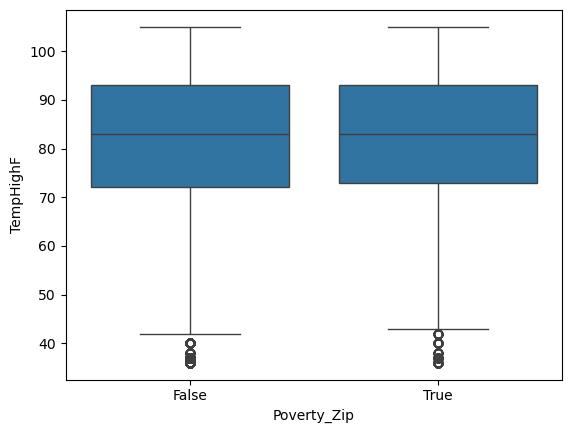

In [14]:
# Compare the high and low temperature for poverty and non-poverty zips
sns.boxplot(x='Poverty_Zip', y='TempHighF', data=crime_temp)

In [15]:
# Aggregate the Highest_Offense_Desc by poverty zip, compare crime in poverty zips by non-poverty zips
crime_poverty = crime_temp.groupby('Poverty_Zip')['Highest_Offense_Desc'].value_counts()
# sns.countplot(x='Highest_Offense_Desc', hue='Poverty_Zip', data=crime_temp)

# How many violent crimes occur in poverty zips, verses non-poverty zips?
violent_crime = [
    'AGG ROBBERY/DEADLY WEAPON',
    'ROBBERY BY ASSAULT',
    'AGG ASLT W/MOTOR VEH FAM/DAT V',
    'AGG ASLT STRANGLE/SUFFOCATE',
    'AGG ASSAULT',
    'AGG ASLT ENHANC STRANGL/SUFFOC',
    'RAPE',
    'DEADLY CONDUCT',
    'AGG ASSAULT FAM/DATE VIOLENCE',
    'AGG RAPE OF A CHILD',
    'AGG RAPE',
    'ROBBERY BY THREAT',
    'AGG ROBBERY BY ASSAULT',
    'RAPE OF A CHILD',
    'AGG ASSAULT WITH MOTOR VEH',
    'MURDER',
    'AGG ASSAULT ON PUBLIC SERVANT',
    'DEADLY CONDUCT FAM/DATE VIOL',
    'MANSLAUGHTER'
]


just_v_crime = crime_temp[crime_temp['Highest_Offense_Desc'].isin(violent_crime)]

# # Where does violent crime occur more often in poverty zips or non-poverty zips? Use the just_v_crime

# violent_crime_poverty_zips = just_v_crime[just_v_crime['Poverty_Zip'] == 'True']
# violent_crime_non_poverty_zips = just_v_crime[just_v_crime['Poverty_Zip'] == 'False']

# print(violent_crime_poverty_zips, violent_crime_non_poverty_zips)


In [16]:
# Do more violent crimes occur in poverty zips verse non-poverty zips?
just_v_crime